 Import Libraries and Load Data

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('mock_twitter_data_140_corrected.csv')

In [13]:
df.head()

,text,sentiment
0,I love sunny days!,positive
1,Feeling great about the new project launch.,positive
2,Today has been a productive day.,positive
3,I don't like how things turned out.,negative
4,Why is this happening to me?,negative


 Text Preprocessing

In [20]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('stopwords')
nltk.download('wordnet')

# Preprocessing function
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove special characters and numbers
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Tokenize and remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing
df['cleaned_text'] = df['text'].apply(preprocess_text)
df.head()




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,sentiment,cleaned_text
0,I love sunny days!,positive,love sunny day
1,Feeling great about the new project launch.,positive,feeling great new project launch
2,Today has been a productive day.,positive,today productive day
3,I don't like how things turned out.,negative,dont like thing turned
4,Why is this happening to me?,negative,happening


In [22]:
print(df.columns)


Index(['text', 'sentiment', 'cleaned_text'], dtype='object')


Vectorization

In [24]:
X = df['cleaned_text']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=500)

# Fit on the training set and transform both training and test sets
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()


Train Classifier

In [25]:
# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = model.predict(X_test_tfidf)

Evaluate Model

Accuracy:0.36363636363636365

Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         4
     neutral       0.00      0.00      0.00         7
    positive       0.44      0.73      0.55        11

    accuracy                           0.36        22
   macro avg       0.15      0.24      0.18        22
weighted avg       0.22      0.36      0.28        22



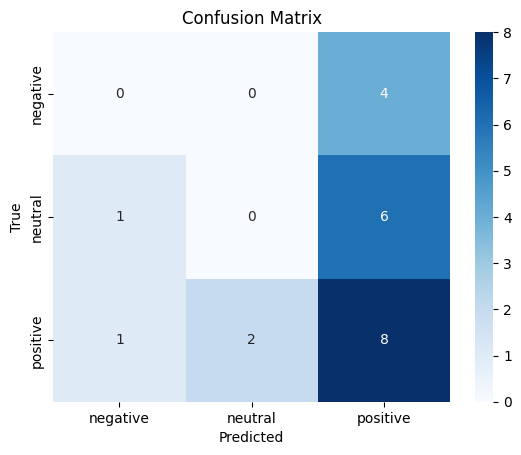

In [27]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy}")

print("\nClassification Report:")
print(classification_report(y_test,y_pred))

conf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()